In [ ]:
!pip install tensorflow
!pip install keras
!pip install numpy
!pip install scikit-learn
!pip install flask

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import random
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

#Inceptionnet


# Set the path to your dataset folder
dataset_dir = '/content/drive/MyDrive/Colab Notebooks/Alal/Rice Leaf Disease Images'

# Define the split ratio
train_ratio = 0.8
test_ratio = 0.2

# Create the train and test directories
train_dir = os.path.join(dataset_dir, 'train')
test_dir = os.path.join(dataset_dir, 'test')

# Step 1: Data Preparation
# Define data generator with data augmentation and normalization
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=1 - train_ratio  # Use the remaining ratio for validation
)

# Generate training and testing datasets from the dataset directory
dataset_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

test_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 4754 images belonging to 4 classes.
Found 1185 images belonging to 4 classes.


In [ ]:
#Inceptionnet


# Set the path to your dataset folder
dataset_dir = '/content/drive/MyDrive/Colab Notebooks/Alal/Rice Leaf Disease Images'

# Define the split ratio
train_ratio = 0.8
test_ratio = 0.2

# Create the train and test directories
train_dir = os.path.join(dataset_dir, 'train')
test_dir = os.path.join(dataset_dir, 'test')

# Step 1: Data Preparation
# Define data generator with data augmentation and normalization
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=1 - train_ratio  # Use the remaining ratio for validation
)

# Generate training and testing datasets from the dataset directory
dataset_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

test_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Step 2: Model Architecture
from keras import regularizers
from keras.applications import InceptionV3

model = tf.keras.Sequential([
    InceptionV3(input_shape=(224, 224, 3), include_top=False, weights='imagenet'),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.5),  # Dropout layer for regularization
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)),  # L2 regularization
    tf.keras.layers.Dense(dataset_generator.num_classes, activation='softmax')
])



# Step 3: Model Compilation
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Step 4: Model Training
#from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau
 #Create a learning rate scheduler
lr_scheduler = ReduceLROnPlateau(factor=0.5, patience=3, min_lr=1e-6)
#early_stopping = EarlyStopping(patience=5, restore_best_weights=True)
history= model.fit (dataset_generator,
    epochs=35,
    validation_data=test_generator,
    callbacks=[lr_scheduler])
   #callbacks=[early_stopping]


# Step 5: Model Evaluation
train_loss,train_accuracy = model.evaluate(dataset_generator)
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Train loss:{train_loss}')
print(f'Train accuracy:{train_accuracy}')
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy}')

Found 4754 images belonging to 4 classes.
Found 1185 images belonging to 4 classes.
87910968/87910968 [==============================] - 1s 0us/step
Epoch 1/35
149/149 [==============================] - 1233s 8s/step - loss: 2.0866 - accuracy: 0.8902 - val_loss: 2.0145 - val_accuracy: 0.9249 - lr: 0.0010
Epoch 2/35
149/149 [==============================] - 100s 673ms/step - loss: 0.3056 - accuracy: 0.9504 - val_loss: 1.2503 - val_accuracy: 0.7468 - lr: 0.0010
Epoch 3/35
149/149 [==============================] - 99s 664ms/step - loss: 0.1547 - accuracy: 0.9697 - val_loss: 0.2379 - val_accuracy: 0.9586 - lr: 0.0010
Epoch 4/35
149/149 [==============================] - 104s 697ms/step - loss: 0.1048 - accuracy: 0.9809 - val_loss: 0.1282 - val_accuracy: 0.9654 - lr: 0.0010
Epoch 5/35
149/149 [==============================] - 99s 661ms/step - loss: 0.1271 - accuracy: 0.9735 - val_loss: 0.6154 - val_accuracy: 0.8970 - lr: 0.0010
Epoch 6/35
149/149 [==============================] - 101s 6

In [ ]:
# Step 6: Model Prediction
# Use the trained model to predict on new unseen images
model.save('/content/drive/MyDrive/Colab Notebooks/Alal/RayhanM_model.h5')
import tensorflow as tf
# Load the trained model
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Alal/Rayhan_model.h5')

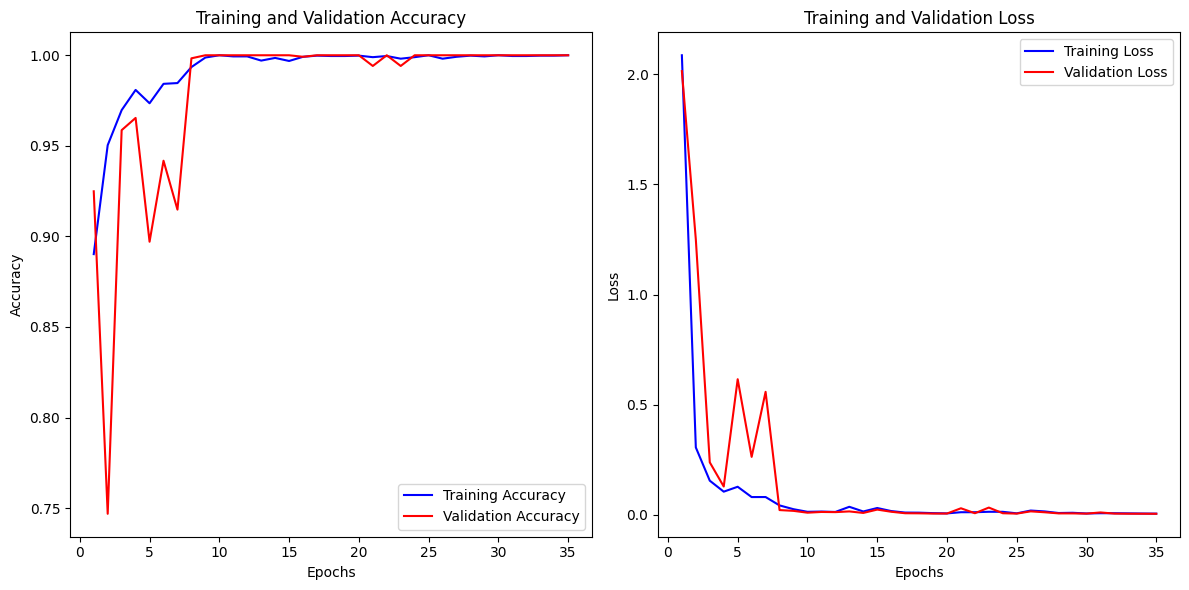

In [ ]:

#Plotting the curves for accuracy and loss
import matplotlib.pyplot as plt
import os
import random
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_accuracy) + 1)

plt.figure(figsize=(12, 6))

# Plotting the accuracy curve
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting the loss curve
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Set the path to the image for prediction
image_path = '/content/drive/MyDrive/Colab Notebooks/Alal/Uuu/Symptoms-of-rice-blast-disease-caused-by-Pyricularia-oryzae.png'

# Preprocess the image
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
image = tf.keras.preprocessing.image.img_to_array(image)
image = image / 255.0
image = tf.expand_dims(image, axis=0)

In [ ]:
# Make the prediction
predictions = loaded_model.predict(image)
class_index = tf.argmax(predictions[0])
class_labels = list(dataset_generator.class_indices.keys())
predicted_class = class_labels[class_index]

print("Predicted class:", predicted_class)

1/1 [==============================] - 0s 33ms/step
Predicted class: Blast
